In [34]:
from utils import read_test_case3_from_txt
import matplotlib.pyplot as plt
import networkx as nx

m ,clauses = read_test_case3_from_txt("./Testcase_Q3.txt")

In [35]:
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]

    def add_edge(self, u, v):
        self.adj_matrix[u-1][v-1] = 1
        self.adj_matrix[v-1][u-1] = 1

def sat_to_vertex_cover(clauses):
    # Count number of distinct variables
    variables = set()
    for clause in clauses:
        for literal in clause:
            variables.add(abs(literal))
    n = len(variables)
    m = len(clauses)

    num_vertices = 2 * n + 3 * m
    graph = Graph(num_vertices)
    literal_to_vertex = {}
    vertex_count = 2 * n

    # Create vertices for literals
    for var in variables:
        vertex_true = 2 * var - 1
        vertex_false = 2 * var
        literal_to_vertex[var] = (vertex_true, vertex_false)
        graph.add_edge(vertex_true, vertex_false)

    # Create triangles for clauses and connect them to literal vertices
    for clause in clauses:
        triangle_base = vertex_count + 1
        vertex_count += 3

        for i, literal in enumerate(clause):
            literal_vertex = literal_to_vertex[abs(literal)][0 if literal > 0 else 1]
            graph.add_edge(triangle_base + i, literal_vertex)

        # Connect the vertices in the triangle
        graph.add_edge(triangle_base, triangle_base + 1)
        graph.add_edge(triangle_base + 1, triangle_base + 2)
        graph.add_edge(triangle_base + 2, triangle_base)

    return n,m,graph

In [36]:
n,m,graph = sat_to_vertex_cover(clauses)

print(2*n+3*m)
print(n+2*m)
# Print the adjacency matrix
for row in graph.adj_matrix:
    print(' '.join(map(str, row)))

12
7
0 1 0 0 0 0 1 0 0 1 0 0
1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 1 0 0 1 0
0 0 0 0 0 1 0 0 1 0 0 0
0 0 0 0 1 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 1 0 0 0
0 0 0 1 0 0 1 0 1 0 0 0
0 0 0 0 1 0 1 1 0 0 0 0
1 0 0 0 0 0 0 0 0 0 1 1
0 0 0 1 0 0 0 0 0 1 0 1
0 0 0 0 0 1 0 0 0 1 1 0


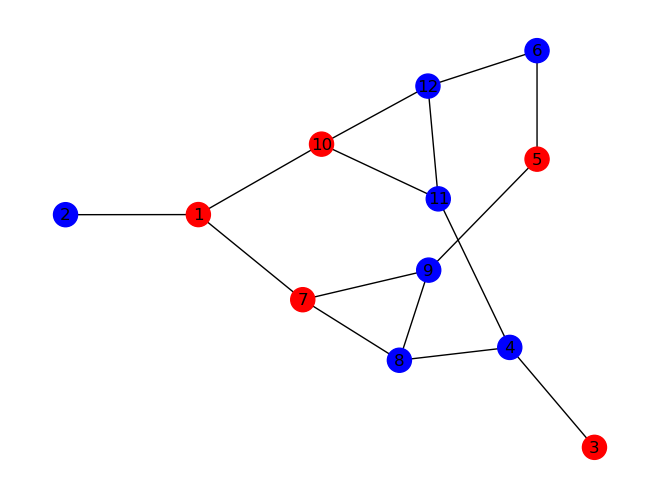

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

def create_and_visualize_graph(clauses):
    graph, vertex_cover = sat_to_vertex_cover(clauses)

    # Create a networkx graph for visualization
    G = nx.Graph()
    for i in range(graph.num_vertices):
        G.add_node(i + 1, color='red' if i + 1 in vertex_cover else 'blue')

    for i in range(graph.num_vertices):
        for j in range(i + 1, graph.num_vertices):
            if graph.adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    # Set colors for nodes in the vertex cover
    colors = [G.nodes[node]['color'] for node in G.nodes]

    # Draw the graph
    nx.draw(G, with_labels=True, node_color=colors)
    plt.show()

def sat_to_vertex_cover(clauses):
    # Count number of distinct variables
    variables = set()
    for clause in clauses:
        for literal in clause:
            variables.add(abs(literal))
    n = len(variables)
    m = len(clauses)

    num_vertices = 2 * n + 3 * m
    graph = Graph(num_vertices)
    literal_to_vertex = {}
    vertex_count = 2 * n

    # Create vertices for literals
    for var in variables:
        vertex_true = 2 * var - 1
        vertex_false = 2 * var
        literal_to_vertex[var] = (vertex_true, vertex_false)
        graph.add_edge(vertex_true, vertex_false)

    # Create triangles for clauses and connect them to literal vertices
    for clause in clauses:
        triangle_base = vertex_count + 1
        vertex_count += 3

        for i, literal in enumerate(clause):
            literal_vertex = literal_to_vertex[abs(literal)][0 if literal > 0 else 1]
            graph.add_edge(triangle_base + i, literal_vertex)

        # Connect the vertices in the triangle
        graph.add_edge(triangle_base, triangle_base + 1)
        graph.add_edge(triangle_base + 1, triangle_base + 2)
        graph.add_edge(triangle_base + 2, triangle_base)

    # Simple approach to find a vertex cover
    vertex_cover = set()
    for var in variables:
        vertex_cover.add(2 * var - 1)  # Add one of the literal vertices

    # Add one vertex from each triangle
    for i in range(2 * n, num_vertices, 3):
        vertex_cover.add(i + 1)

    return graph, vertex_cover


create_and_visualize_graph(clauses)
